In [16]:
# Importing the Qiskit standard library and setting up an account
# Version: qiskit 2.2.1 ; Python 3.13.8  it should work !!
import math
from math import sqrt
from numpy import pi 
from qiskit import *
from qiskit.quantum_info import Statevector, Operator
from qiskit_aer import AerSimulator
from qiskit.visualization import *

In [17]:
# Choosing a quantum simulator (or processor).
# backend = BasicAer.get_backend('qasm_simulator')
backend = AerSimulator(method='unitary')

In [18]:
# utest = Operator(Oracle Uf)
utest=Operator([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1/sqrt(2), -1/sqrt(2)], [0, 0, 1/sqrt(2), 1/sqrt(2)]])
Operator.is_unitary(utest) # or utest.is_unitary()

True

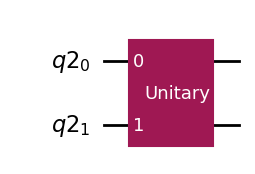

In [19]:
# Creating quantum, classical registers and a quantum circuit
n0=2 # Number of qubits and bits
q0 = QuantumRegister(n0) # Quantum Register
# c0 = ClassicalRegister(n0) # Classical Register
Utest = QuantumCircuit(q0,name='Uf') # Quantum algorithm - quantum circuit
Utest.append(utest,[0,1])
Utest.draw(output='mpl') # Quantum circuit sketch


In [20]:
Uf=Utest.to_gate()

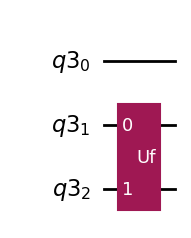

In [21]:
# Creating quantum, classical registers and a quantum circuit
n=3 # Number of qubits and bits
q = QuantumRegister(n) # Quantum Register
# c = ClassicalRegister(n) # Classical Register
# circuit0 = QuantumCircuit(q, c) # Algorytm kwantowy - kwantowy obwĂłd
Circuit = QuantumCircuit(q) # Quantum algorithm - quantum circuit
Circuit.append(Uf,[q[1],q[2]])
Circuit.draw(output='mpl') # Quantum circuit sketch

In [22]:
Operator(Circuit)

Operator([[ 1.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  1.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  1.        +0.j,
            0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
            1.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.70710678+0.j,  0.        +0.j,
           -0.70710678+0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
            0.        +0.j,  0.        +0.j,  0.70710678+0.j,
            0.        +0.j

In [23]:
Operator(Circuit).to_matrix()

array([[ 1.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  1.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  1.        +0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         1.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j,  0.        +0.j,
        -0.70710678+0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j,  0.70710678+0.j,
         0.        +0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.      

In [24]:
print(backend.configuration().basis_gates) # basis gates in used backend

['ccx', 'ccz', 'cp', 'crx', 'cry', 'crz', 'cswap', 'csx', 'cu', 'cu1', 'cu2', 'cu3', 'cx', 'cy', 'cz', 'diagonal', 'ecr', 'h', 'id', 'mcp', 'mcphase', 'mcr', 'mcrx', 'mcry', 'mcrz', 'mcswap', 'mcsx', 'mcu', 'mcu1', 'mcu2', 'mcu3', 'mcx', 'mcy', 'mcz', 'multiplexer', 'p', 'pauli', 'r', 'rx', 'rxx', 'ry', 'ryy', 'rz', 'rzx', 'rzz', 's', 'sdg', 'store', 'swap', 'sx', 'sxdg', 't', 'tdg', 'u', 'u1', 'u2', 'u3', 'unitary', 'x', 'y', 'z', 'delay', 'reset', 'save_state', 'save_unitary', 'set_unitary']


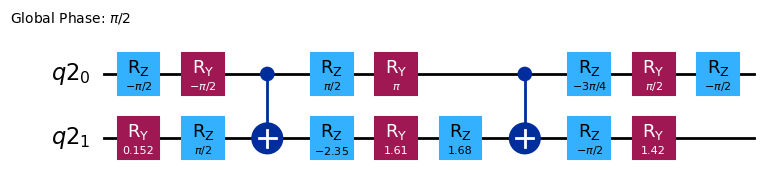

In [25]:
circuit0_transpile=transpile(Utest, basis_gates=['rz', 'ry', 'cx']) # see Lecture 4 and 5, decomposition of unitary transformations into such quantum gates that are understood by a quantum compiler
circuit0_transpile.draw(output='mpl') 

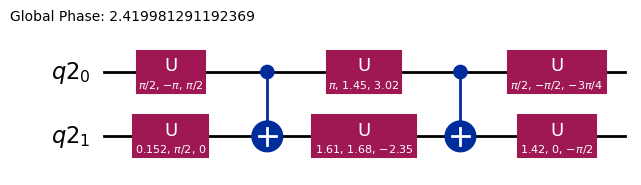

In [26]:
circuit0_decomp=Utest.decompose(reps=2) # see Lecture 4 and 5, decomposition Utest into such quantum gates that are understood by a quantum compiler 
circuit0_decomp.draw(output='mpl') 

In [27]:
# Copy of the circuit not to modify the original one
circuit_to_run = circuit0_transpile.copy()

# Important: In new Aer we need to manually save unitary matrix
circuit_to_run.save_unitary()

# New method of running in Qiskit 1.0+ / 2.0+
job = backend.run(circuit_to_run)
results = job.result()

# Getting the results
print(results.get_unitary(circuit_to_run, decimals=3))

Operator([[ 1.   +0.j,  0.   +0.j,  0.   -0.j,  0.   +0.j],
          [-0.   +0.j,  1.   +0.j, -0.   -0.j,  0.   -0.j],
          [-0.   -0.j,  0.   +0.j,  0.707-0.j, -0.707+0.j],
          [-0.   -0.j, -0.   -0.j,  0.707-0.j,  0.707-0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [28]:
circuit_to_run_decomp = circuit0_decomp.copy()
circuit_to_run_decomp.save_unitary()

job = backend.run(circuit_to_run_decomp)
results = job.result()

print(results.get_unitary(circuit_to_run_decomp, decimals=3))

Operator([[ 1.   +0.j,  0.   +0.j,  0.   -0.j,  0.   +0.j],
          [-0.   +0.j,  1.   +0.j, -0.   +0.j,  0.   -0.j],
          [-0.   -0.j,  0.   +0.j,  0.707+0.j, -0.707-0.j],
          [-0.   -0.j, -0.   -0.j,  0.707+0.j,  0.707+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [29]:
145203 %64

51

In [30]:
136225 %64

33

1

In [31]:
import numpy as np
from qiskit.quantum_info import Operator
from math import sqrt

# --- Task 1: Create Matrix Functions ---

def create_xor_oracle_matrix(n, target_str):
    """
    Creates the XOR Oracle matrix U_f |y>|x> = |y XOR f(x)> |x>.
    Ref: Slides 6, 16 [cite: 63, 194]
    Assumption: The MSB (q_n-1) is the target qubit 'y',
    and the remaining n-1 qubits are the address 'x'.
    """
    N = 2**n
    U = np.zeros((N, N), dtype=complex)

    # Target 'a' is the address we are looking for (parsed from binary string)
    target_val = int(target_str, 2)

    for i in range(N):
        # In Qiskit/Little-Endian: i corresponds to state |q_{n-1}...q_0>
        # Let's assume q_{n-1} is y (target), q_{n-2}...q_0 is x (address)
        # Note: This split depends on bit ordering convention.
        # Here we treat the highest bit as 'y' for distinct separation.
        y = (i >> (n - 1)) & 1
        x = i & ((1 << (n - 1)) - 1)

        # Function f(x) = 1 if x == target_val, else 0
        f_x = 1 if x == target_val else 0

        new_y = y ^ f_x

        # Reconstruct index j
        j = (new_y << (n - 1)) | x

        U[j, i] = 1.0

    return U

def create_phase_oracle_matrix(n, target_str):
    """
    Creates the Phase Oracle matrix U_f |x> = (-1)^f(x) |x>.
    Ref: Slides 6, 17 [cite: 69, 229]
    """
    N = 2**n
    U = np.zeros((N, N), dtype=complex)
    target_val = int(target_str, 2)

    for i in range(N):
        # Diagonal elements: -1 if it's the target state, 1 otherwise
        if i == target_val:
            U[i, i] = -1.0
        else:
            U[i, i] = 1.0

    return U

# --- Execute Specific Tasks ---

n = 3

# 1.1 XOR Oracle Matrix (Example for Group @11:45 where a=01 for address)
# Total n=3 implies 2 address bits (to match a='01') + 1 ancilla bit.
xor_target = '01'
matrix_xor = create_xor_oracle_matrix(n, xor_target)
print(f"Task 1.1: XOR Oracle Matrix (n={n}, target address='{xor_target}'):")
print(np.round(matrix_xor.real, 1)) # Printing real part for clarity as it's 0/1

# 1.2 Phase Oracle Matrix (Example for Group @11:45 where a=100)
phase_target = '100'
matrix_phase = create_phase_oracle_matrix(n, phase_target)
print(f"\nTask 1.2: Phase Oracle Matrix (n={n}, target='{phase_target}'):")
print(np.round(matrix_phase.real, 1))

# --- Task 2: Create Quantum Gate ---
# Creating the gate from the Phase Oracle Matrix (standard for Grover's)
gate_Uf = Operator(matrix_phase)
print(f"\nTask 2: Is U_f unitary? {gate_Uf.is_unitary()}")

Task 1.1: XOR Oracle Matrix (n=3, target address='01'):
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]

Task 1.2: Phase Oracle Matrix (n=3, target='100'):
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]]

Task 2: Is U_f unitary? True


3,4,5

In [32]:
# --- Task 3: Explicit matrix form of |0>_n <0| ---
# Ref: Slide 10, 13 [cite: 122, 163]

N = 2**n # For n=3, N=8
ket_0 = np.zeros((N, 1))
ket_0[0, 0] = 1 # The state |000> corresponds to the 0-th index

# Outer product |0><0|
projector_0 = np.dot(ket_0, ket_0.T)

print(f"Task 3: Matrix form of |0>_n <0| (n={n}):")
print(projector_0)

# --- Task 4: Explicit matrix form of 2|0>_n <0| - I ---
# Ref: Slide 10, 13 [cite: 123, 163]
identity_matrix = np.eye(N)
reflection_zero = 2 * projector_0 - identity_matrix

print(f"\nTask 4: Matrix form of 2|0>_n <0| - I (n={n}):")
print(reflection_zero)

# --- Task 5: Prove X^n (2|0><0| - I) X^n = 2|1><1| - I ---
# Ref: Slide 11, 13

# Create X tensor n operator
# In Qiskit, tensor order is reversed, but for X^n (all X) it is symmetric.
op_x = Operator.from_label('X' * n).to_matrix()

# Calculate LHS: X^n @ (2|0><0| - I) @ X^n
lhs = op_x @ reflection_zero @ op_x

# Calculate RHS: 2|1><1| - I
# |1>_n corresponds to the index N-1 (binary 111...1)
ket_1 = np.zeros((N, 1))
ket_1[N-1, 0] = 1
projector_1 = np.dot(ket_1, ket_1.T)
rhs = 2 * projector_1 - identity_matrix

# Proof check
is_equal = np.allclose(lhs, rhs)
print(f"\nTask 5: Proving X^n (2|0><0| - I) X^n = 2|1><1| - I")
print(f"Matrices match: {is_equal}")

Task 3: Matrix form of |0>_n <0| (n=3):
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]

Task 4: Matrix form of 2|0>_n <0| - I (n=3):
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.]]

Task 5: Proving X^n (2|0><0| - I) X^n = 2|1><1| - I
Matrices match: True


6

In [33]:
# --- Task 6: Explicit matrix form of W (Diffusion Operator) ---
# Ref: Slide 9, 12, 13 [cite: 112, 149, 163]

# 1. Create Hadamard tensor n operator
op_h = Operator.from_label('H' * n).to_matrix()

# 2. Calculate W = H^n @ (2|0><0| - I) @ H^n
# Note: We already calculated (2|0><0| - I) as 'reflection_zero' in Task 4
W_matrix = op_h @ reflection_zero @ op_h

print(f"Task 6: Explicit Matrix form of W (first 4x4 block shown for brevity):")
print(np.round(W_matrix[:4, :4], 3))

# Verify W is unitary
is_w_unitary = np.allclose(np.eye(N), W_matrix @ W_matrix.conj().T)
print(f"Is W unitary? {is_w_unitary}")

Task 6: Explicit Matrix form of W (first 4x4 block shown for brevity):
[[-0.75+0.j  0.25+0.j  0.25+0.j  0.25+0.j]
 [ 0.25+0.j -0.75+0.j  0.25+0.j  0.25+0.j]
 [ 0.25+0.j  0.25+0.j -0.75+0.j  0.25+0.j]
 [ 0.25+0.j  0.25+0.j  0.25+0.j -0.75+0.j]]
Is W unitary? True


7

Circuit for U_f (Target '100'):


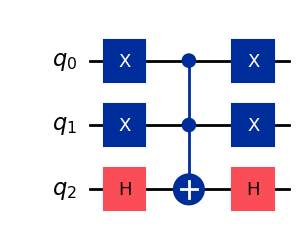


Circuit for W (Diffusion):


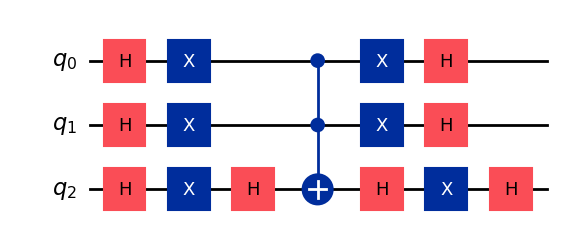

In [34]:
from qiskit import QuantumCircuit

# --- Task 7: Create Quantum Gates for U_f and W using Qiskit ---
# Ref: Slide 12, 13 [cite: 149, 165]

def create_phase_oracle_circuit(n, target_str):
    """
    Creates a Phase Oracle Circuit.
    logic: X gates to match 0s in target, Multi-Controlled Z, X gates to revert.
    """
    qc = QuantumCircuit(n, name="U_f (Phase)")

    # 1. Apply X gates to qubits that are '0' in the target string
    # Qiskit uses little-endian (q0 is rightmost char in string)
    # e.g., target '100' -> q2=1, q1=0, q0=0.
    # We need to wrap q1 and q0 with X gates to trigger the control on state |111>
    rev_target = target_str[::-1] # reverse to map string index to qubit index
    for i, char in enumerate(rev_target):
        if char == '0':
            qc.x(i)

    # 2. Apply Multi-Controlled Z (equivalent to MCX surrounded by H on target)
    # Using specific tip: Use X, H, CNOT.
    # A CCZ (on 3 qubits) is: H(q2) -> CCX(q0,q1->q2) -> H(q2)
    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1) # Multi-controlled X (Toffoli for n=3)
    qc.h(n-1)

    # 3. Revert X gates (Uncompute)
    for i, char in enumerate(rev_target):
        if char == '0':
            qc.x(i)

    return qc

def create_diffusion_circuit(n):
    """
    Creates Grover's Diffusion Operator Circuit W.
    Ref: Slide 12 [cite: 146-149]
    Formula: W = H^n X^n (Multi-Z) X^n H^n (up to global phase)
    This implements 2|s><s| - I
    """
    qc = QuantumCircuit(n, name="W (Diff)")

    # 1. Apply H to all qubits
    qc.h(range(n))

    # 2. Apply X to all qubits
    qc.x(range(n))

    # 3. Apply Multi-Controlled Z (reflect about |111>)
    # Construction: H on target -> MCX -> H on target
    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)

    # 4. Apply X to all qubits
    qc.x(range(n))

    # 5. Apply H to all qubits
    qc.h(range(n))

    return qc

# Visualization
# 1. Phase Oracle for target '100' (Example for Group @11:45)
qc_oracle = create_phase_oracle_circuit(n=3, target_str='100')
print("Circuit for U_f (Target '100'):")
display(qc_oracle.draw(output='mpl'))

# 2. Diffusion Operator W
qc_diffusion = create_diffusion_circuit(n=3)
print("\nCircuit for W (Diffusion):")
display(qc_diffusion.draw(output='mpl'))